In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
data.shape

(517, 13)

In [4]:
data1 = data.dropna()
data1.shape

(517, 13)

In [5]:
data1.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
notAffected = data1[data1['area'] == 0]

In [8]:
notAffected

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [9]:
mostlyAffected = data1[data1['area'] > 13]

In [10]:
mostlyAffected

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
203,8,6,oct,wed,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70
204,5,6,mar,sat,90.6,50.1,100.4,7.8,15.1,64,4.0,0.0,13.99
205,4,5,sep,thu,92.9,137.0,706.4,9.2,22.1,34,1.8,0.0,14.57
206,2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1,3,aug,fri,95.9,158.0,633.6,11.3,27.5,29,4.5,0.0,43.32
497,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
498,6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54
504,4,3,aug,wed,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,49.59


In [11]:
partiallyAffected = data1[(data1['area'] <= 13) & (data1['area'] > 0)]

In [12]:
partiallyAffected

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1,2,aug,thu,91.0,163.2,744.4,10.1,26.7,35,1.8,0.0,5.80
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44


In [13]:
merged_data = pd.concat([partiallyAffected, mostlyAffected])

In [14]:
merged_data.shape

(270, 13)

In [15]:
merged_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1,3,aug,fri,95.9,158.0,633.6,11.3,27.5,29,4.5,0.0,43.32
497,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
498,6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54
504,4,3,aug,wed,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,49.59


In [16]:
data1.sort_values('temp', ascending=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
498,6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54
484,2,5,aug,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,26.43
496,4,5,aug,mon,96.2,175.5,661.8,16.8,32.6,26,3.1,0.0,2.77
491,4,4,aug,thu,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,0.00
492,1,3,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03
465,2,2,feb,sat,79.5,3.6,15.3,1.8,4.6,59,0.9,0.0,6.84
463,6,5,feb,tue,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39
282,6,3,feb,sun,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00


In [17]:
data1.sort_values('wind', ascending=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
469,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13
475,2,5,jun,thu,93.7,121.7,350.2,18.0,22.7,40,9.4,0.0,3.19
411,7,4,feb,fri,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0,4.62
168,6,5,mar,fri,91.2,48.3,97.8,12.5,14.6,26,9.4,0.0,2.53
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,6,4,mar,sat,90.8,41.9,89.4,7.9,13.3,42,0.9,0.0,7.40
129,2,5,oct,sun,92.6,46.5,691.8,8.8,15.4,35,0.9,0.0,0.00
465,2,2,feb,sat,79.5,3.6,15.3,1.8,4.6,59,0.9,0.0,6.84
166,6,5,aug,wed,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29


In [18]:
data1.sort_values('area', ascending=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,7,5,sep,sat,92.8,73.2,713.0,22.6,19.3,38,4.0,0.0,0.00
10,7,5,sep,sat,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,0.00
258,3,4,aug,sat,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.00
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00


## **Transpose**

In [19]:
data_transpose = data1.transpose()
data_transpose

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
X,7,7,7,8,8,8,8,8,8,7,...,2,1,5,6,8,4,2,7,1,6
Y,5,4,4,6,6,6,6,6,6,5,...,4,2,4,5,6,3,4,4,4,3
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
FFMC,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91.0,92.5,...,91.0,91.0,91.0,91.0,81.6,81.6,81.6,81.6,94.4,79.5
DMC,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88.0,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146.0,3.0
DC,94.3,669.1,686.9,77.5,102.2,488.0,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
ISI,5.1,6.7,6.7,9.0,9.6,14.7,8.5,10.7,7.0,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18.0,14.6,8.3,11.4,22.2,24.1,8.0,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
RH,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31


<Figure size 1000x1000 with 0 Axes>

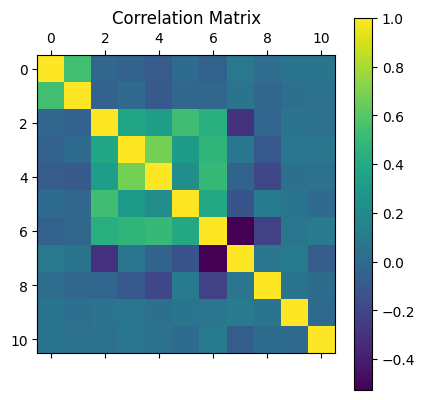

In [20]:
plt.figure(figsize=(10, 10))
plt.matshow(data1.select_dtypes(include='number').corr())
plt.title("Correlation Matrix")
plt.colorbar()
plt.show()


## **Melting Data**

In [21]:
melting_data = pd.melt(data1, id_vars='area', value_vars=['temp'])

In [22]:
melting_data

,area,variable,value
0,0.00,temp,8.2
1,0.00,temp,18.0
2,0.00,temp,14.6
3,0.00,temp,8.3
4,0.00,temp,11.4
...,...,...,...
512,6.44,temp,27.8
513,54.29,temp,21.9
514,11.16,temp,21.2
515,0.00,temp,25.6


## **Casting Table**

In [23]:
casting = data1.pivot_table(index=['month'], values=['rain'], columns='area')

In [24]:
casting.shape

(12, 251)

In [25]:
casting

rain                                                          \
area    0.00    0.09    0.17    0.21    0.24    0.33    0.36    0.41      
month                                                                     
apr    0.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
aug    0.035294     0.0     0.0     0.0     0.0     NaN     NaN     NaN   
dec         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
feb    0.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
jan    0.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
jul    0.014286     NaN     NaN     NaN     NaN     NaN     0.0     NaN   
jun    0.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
mar    0.005714     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
may    0.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
nov    0.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
oct    0.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
sep    0.000000     NaN     NaN     NaN     NaN     0.0     NaN     0.0   

                       ...                                                  \
area  0.43    0.47     ... 105.66  154.88  174.63  185.76  196.48  200.94    
month                  ...                                                   
apr       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
aug       0.0     NaN  ...     NaN     NaN     0.0     0.0     0.0     NaN   
dec       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
feb       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
jan       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
jul       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
jun       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
mar       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
may       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
nov       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
oct       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
sep       0.0     0.0  ...     0.0     0.0     NaN     NaN     NaN     0.0   

                                       
area  212.88  278.53  746.28  1090.84  
month                                  
apr       NaN     NaN     NaN     NaN  
aug       NaN     NaN     0.0     NaN  
dec       NaN     NaN     NaN     NaN  
feb       NaN     NaN     NaN     NaN  
jan       NaN     NaN     NaN     NaN  
jul       NaN     0.0     NaN     NaN  
jun       NaN     NaN     NaN     NaN  
mar       NaN     NaN     NaN     NaN  
may       NaN     NaN     NaN     NaN  
nov       NaN     NaN     NaN     NaN  
oct       NaN     NaN     NaN     NaN  
sep       0.0     NaN     NaN     0.0  

[12 rows x 251 columns]